In [80]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline
import math as math

import warnings
warnings.filterwarnings('ignore')
plt.rc('figure', figsize=(10, 5))

In [81]:
train = pd.read_csv('./titanic_train.csv')
test = pd.read_csv('./titanic_test.csv')

train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"White, Mr. Percival Wayland",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [82]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [83]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
666,667,0,2,"Butler, Mr. Reginald Fenton",male,25.0,0,0,234686,13.0000,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,NaN,S
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C
464,465,0,3,"Maisner, Mr. Simon",male,NaN,0,0,A/S 2816,8.0500,NaN,S
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


In [84]:
print(train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [85]:
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [86]:
# Hypotheses
# Sex: Females are more likely to survive.
# SibSp/Parch: People traveling alone are more likely to survive.
# Age: Young children are more likely to survive.
# Pclass: People of higher socioeconomic class are more likely to survive.

Percentage of females who survived: 74.2038216561
Percentage of males who survived: 18.8908145581


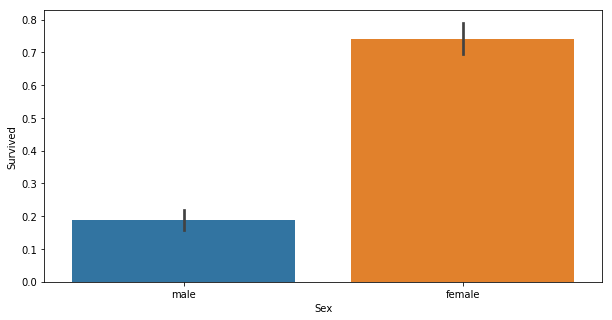

In [87]:
# Histogram by sex
sns.barplot(x="Sex", y="Survived", data=train)

# percentage of female and male survivors
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize=True)[1]*100)

print("Percentage of males who survived:", train['Survived'][train['Sex'] == 'male'].value_counts(normalize=True)[1]*100)

Percentage of Pclass = 1 who survived: 62.962962963
Percentage of Pclass = 2 who survived: 47.2826086957
Percentage of Pclass = 3 who survived: 24.2362525458


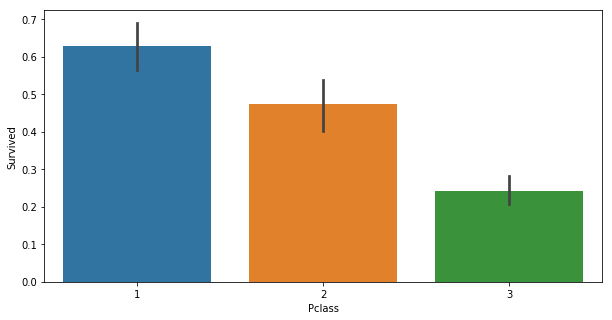

In [88]:
# histogram of people who survived by Pclass
sns.barplot(x="Pclass", y="Survived", data=train)

# percentage of people that survived by Pclass
print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

Percentage of SibSp = 0 who survived: 34.5394736842
Percentage of SibSp = 1 who survived: 53.5885167464
Percentage of SibSp = 2 who survived: 46.4285714286


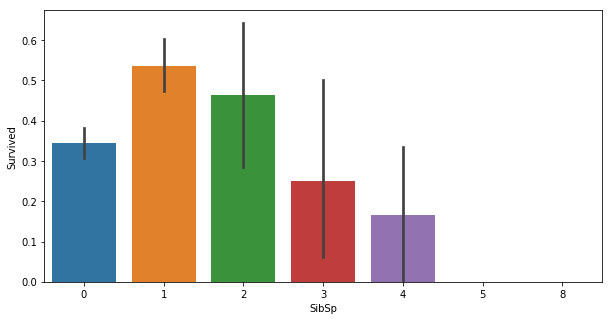

In [89]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=train)

#I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

<p>In general, as the number of siblings increases, chance of survival decreases, but someone with no spouse or sibling is less likely to survive than someone with 1 or 2</p>

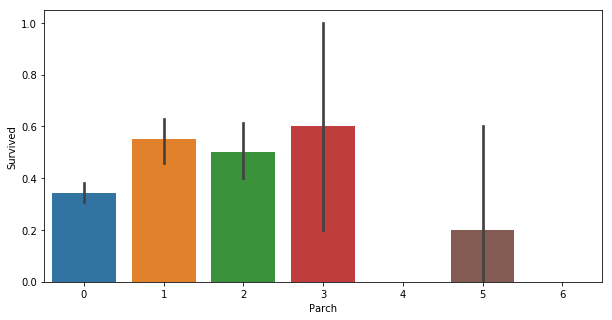

In [90]:
#draw a bar plot for Parch vs. survival (Parch = # of parent or children)
sns.barplot(x="Parch", y="Survived", data=train)
plt.show()

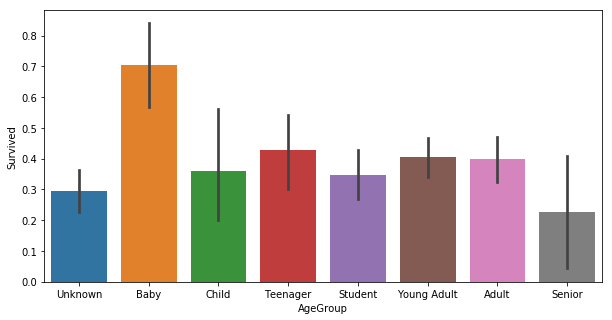

In [91]:
#sort the ages into logical categories
# Fill N/A age values with -0.5, this will be marked "Unknown" below in "AgeGroup" column
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)

ageBins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
binLabels = ["Unknown", 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], ageBins, labels = binLabels)
test['AgeGroup'] = pd.cut(test["Age"], ageBins, labels = binLabels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

Percentage of hasCabinNumber = 1 who survived: 66.6666666667
Percentage of hasCabinNumber = 0 who survived: 29.9854439592


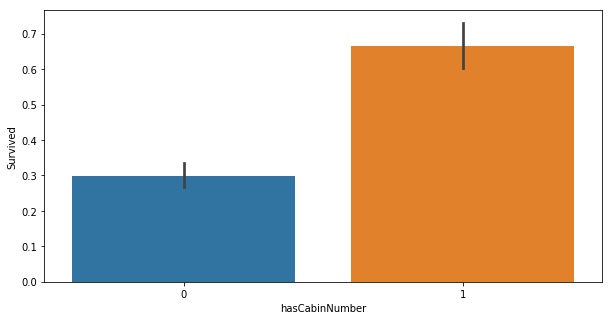

In [92]:
# Idea is that people with recorded cabin numbers are of higher socioeconomic status and are more likely to survive

train["hasCabinNumber"] = (train["Cabin"].notnull().astype('int'))
test["hasCabinNumber"] = (test["Cabin"].notnull().astype('int'))

#calculate percentages of hasCabinNumber vs. survived
print("Percentage of hasCabinNumber = 1 who survived:", train["Survived"][train["hasCabinNumber"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of hasCabinNumber = 0 who survived:", train["Survived"][train["hasCabinNumber"] == 0].value_counts(normalize = True)[1]*100)
#draw a bar plot of hasCabinNumber vs. survival
sns.barplot(x="hasCabinNumber", y="Survived", data=train)
plt.show()

# Cleaning Data

In [93]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,hasCabinNumber
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,204,889,891,891.000000
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,8,NaN
top,NaN,NaN,NaN,"White, Mr. Percival Wayland",male,NaN,NaN,NaN,347082,NaN,B96 B98,S,Young Adult,NaN
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,220,NaN
mean,446.000000,0.383838,2.308642,NaN,NaN,23.699966,0.523008,0.381594,NaN,32.204208,NaN,NaN,NaN,0.228956
std,257.353842,0.486592,0.836071,NaN,NaN,17.731181,1.102743,0.806057,NaN,49.693429,NaN,NaN,NaN,0.420397
min,1.000000,0.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,223.500000,0.000000,2.000000,NaN,NaN,6.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN,NaN,0.000000
50%,446.000000,0.000000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,NaN,0.000000


In [94]:
# Drop cabin feature because there is so few records of the cabin number and its significance is recorded in "hasCabinNumber"
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

In [95]:
#we can also drop the Ticket feature since it's unlikely to yield any useful information
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

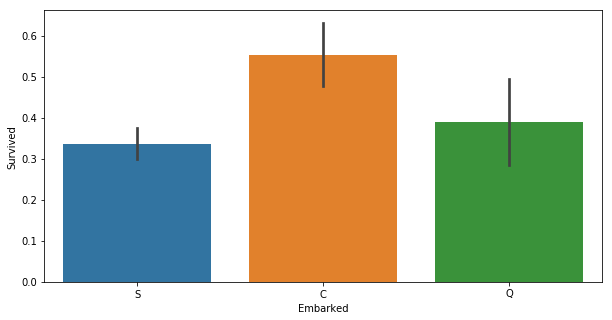

In [96]:
sns.barplot(x="Embarked", y="Survived", data=train)

### The low number of people who survived from Southampton can probably be explained by the fact that most passengers were traveling from Southampton

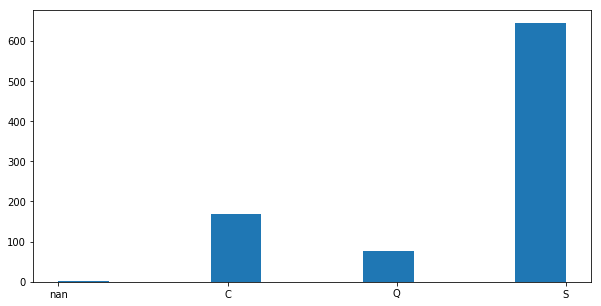

In [97]:
plt.hist(train['Embarked'])
plt.show()

### Since the majority of passengers are from Southampton, we will fill the nan values with S

In [98]:
train = train.fillna({"Embarked": train['Embarked'].mode()[0]}) # {"Embarked": "S"}

### We will try to predict the age of passengers by extracting the titles

In [99]:
# Create a combined group of both datasets
combine = [train, test]

# Extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

# Creates a cross tablulated frequency table
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [100]:
#replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.250000
5,Royal,1.000000


In [101]:
#map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

### Filling missing age with mode age group for each title

In [102]:
# fill missing age with mode age group for each title
title_age_group_mapping = {}
for titleId in title_mapping.values():
    categories = train[train['Title'] == titleId]['AgeGroup'].value_counts().axes[0]
    # Make sure that the mode is not "Unknown" value. If it is, take the next largest value 
    if categories[0] is 'Unknown':
        title_age_group_mapping[titleId] = categories[1]
    else:
        title_age_group_mapping[titleId] = categories[0]

print(title_age_group_mapping)

{1: 'Young Adult', 2: 'Student', 3: 'Adult', 4: 'Baby', 5: 'Adult', 6: 'Adult'}


In [103]:
for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = title_age_group_mapping[train["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = title_age_group_mapping[test["Title"][x]]

In [104]:
# All unknown values in "AgeGroup" should be filled
train['AgeGroup'].value_counts()

Young Adult    339
Adult          213
Student        174
Teenager        70
Baby            48
Child           25
Senior          22
Unknown          0
Name: AgeGroup, dtype: int64

### Map each age value to a numerical value


In [105]:
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
for dataset in combine:
    dataset['AgeGroup'] = dataset['AgeGroup'].map(age_mapping)
    dataset.drop(['Age'], axis=1, inplace=True)

In [106]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,hasCabinNumber,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,S,4,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C,6,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,S,5,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,S,5,1,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,S,5,0,1


In [107]:
# Dropping name feature since we have extracted the titles
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

### Need to map each sex feature to a numerical value

In [108]:
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,hasCabinNumber,Title
0,1,0,3,0,1,0,7.2500,S,4,0,1
1,2,1,1,1,1,0,71.2833,C,6,1,3
2,3,1,3,1,0,0,7.9250,S,5,0,2
3,4,1,1,1,1,0,53.1000,S,5,1,3
4,5,0,3,0,0,0,8.0500,S,5,0,1


In [109]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,hasCabinNumber,Title
0,1,0,3,0,1,0,7.2500,1,4,0,1
1,2,1,1,1,1,0,71.2833,2,6,1,3
2,3,1,3,1,0,0,7.9250,1,5,0,2
3,4,1,1,1,1,0,53.1000,1,5,1,3
4,5,0,3,0,0,0,8.0500,1,5,0,1


In [110]:
print(test['Fare'].isnull().any())
print(train['Fare'].isnull().any())

True
False


In [111]:
# We need to fill in the missing values for the 'Fare' in the test dataset 
for i in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][i]):
        pclass = test["Pclass"][i] #Pclass = 3
        test["Fare"][i] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)

In [112]:
print(test['Fare'].isnull().any())

False


In [113]:
# Map fare values into groups (quartiles) of numerical values (essentially binning each fare value)
# In this case we will use 4 bins
train['FareBin'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBin'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

train = train.drop(['Fare'], axis=1)
test = test.drop(['Fare'], axis=1)

In [114]:
train.sample(5)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,hasCabinNumber,Title,FareBin
405,406,0,2,0,1,0,1,5,0,1,3
473,474,1,2,1,0,0,2,4,1,3,2
631,632,0,3,0,0,0,1,6,0,1,1
454,455,0,3,0,0,0,1,5,0,1,2
841,842,0,2,0,0,0,1,3,0,1,2


In [115]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,hasCabinNumber,Title,FareBin
0,892,3,0,0,0,3,5,0,1,1
1,893,3,1,1,0,1,6,0,3,1
2,894,2,0,0,0,3,7,0,1,2
3,895,3,0,0,0,1,5,0,1,2
4,896,3,1,1,1,1,4,0,3,2


# Model choosing time

In [116]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train['Survived']
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=.22, random_state=0)

### Models to try

<ul>
    <li>Gaussian Naive Bayes</li>
    <li>Logistic Regression</li>
    <li>Support Vector Machines</li>
    <li>Perceptron</li>
    <li>Decision Tree Classifier</li>
    <li>Random Forest Classifier</li>
    <li>KNN or k-Nearest Neighbors</li>
    <li>Stochastic Gradient Descent</li>
    <li>Gradient Boosting Classifier</li>
</ul>

In [117]:
# Let's find the accuracy of each of these models
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [118]:
models = ['LogisticRegression', 'SVC', 'GaussianNB', 'LinearSVC', 'Perceptron', 
          'DecisionTreeClassifier', 'RandomForestClassifier', 'KNeighborsClassifier', 'SGDClassifier', 'GradientBoostingClassifier']

def accuracy_of_models(models, x_train, y_train, x_test, y_test):
    scores = []
    for model_name in models:
        model = eval(model_name)()
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        score = round(accuracy_score(y_pred, y_test) * 100, 2)
        scores.append(score)
    return scores
    
def model_accuracy_table(models, accuracy_scores):
    models_df = pd.DataFrame({
        'Model': models,
        'Score': accuracy_scores,
    });
    models_df.sort_values(by='Score', ascending=False, inplace=True)
    return models_df

In [119]:
scores = accuracy_of_models(models, x_train, y_train, x_test, y_test)

In [120]:
model_accuracy_table(models, scores)

,Model,Score
9,GradientBoostingClassifier,84.26
6,RandomForestClassifier,83.25
1,SVC,81.22
5,DecisionTreeClassifier,81.22
0,LogisticRegression,79.19
2,GaussianNB,78.68
4,Perceptron,78.68
3,LinearSVC,78.17
7,KNeighborsClassifier,77.66
8,SGDClassifier,76.65
